# 7 Statistics with NumPy
## 7_7 Histograms in NumPy part 2

#### numpy.histogram2d(x, y, bins=10, range=None, density=None, weights=None)
- Compute the bi-dimensional histogram of two data samples.
- Ex. X = A[0]; Y = A[1]
- We can use a 2D histogram to get an idea of how the values are spread out across the plain.
- You can think about it as a histogram on top of scatter plot

#### numpy.histogramdd(sample, bins=10, range=None, density=None, weights=None)
- Compute the multidimensional histogram of some data.

In [20]:
import numpy as np
np.__version__

'1.26.2'

In [21]:
# Functions

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [22]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9]])
#              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (2, 5) | ndim: 2 | size: 10 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9]])

In [48]:
# 2D Histogram: A[0] is X and A[1] is Y
# np.histogram2d(A[0], A[1])) - np.histogram2d(A[0], A[1], bins=4))
# Set the bin size to 4 so the output is more contained 
h2d = np.histogram2d(A[0], A[1], bins=4)
display(h2d)

# Tuple: One 2D array (Density) and two 1D arrays (bins edges on X and on Y)
# There is a slight twist when we look at the density array, the values we see in
# the first row of the density array include all points whose X value falls within
# the first bin. Density Matrix -> DM
# DM ROW -> X bin | DM COLUMN -> Y bin

# The '2.' we see in the third position (DM[0,2]) suggest that there are two
# points which feature in the first bin on the X axis and the third bin on the
# Y axis. 
display(h2d[0][0,2])
# Therefore, we are looking for points that have X coordinates between 0 and 0..75
# and Y coordinates between 5.5 and 7.25. Lopking at matrix A they are: in X the
# two 0 and in Y the two 6
print(f'X -> A[0,1]: {A[0,1]}, A[0,2]: {A[0,2]}')
print(f'Y -> A[1,1]: {A[1,1]}, A[1,2]: {A[1,2]}')

# Hay un pequeño cambio cuando observamos la matriz de densidad, los valores que
# vemos en la primera fila de la matriz de densidad incluyen todos los puntos
# cuyo valor X cae dentro del primer contenedor

(array([[0., 0., 2., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]))

2.0

X -> A[0,1]: 0, A[0,2]: 0
Y -> A[1,1]: 6, A[1,2]: 6


In [47]:
# JM-- DM inverted in rowsorder and transpose is the 2d Histo?
# display(h2d[0])

# I have to make a Function to create a DM_real

# DM_real = h2d[0][::-1]
# DM_real
# display(h2d[0], h2d[0][::-1])
# h2d[0].T

In [24]:
# To fully comprehend the results of the histogram is better that 
# we first display a sorted version of the flattened array
display(np.sort(A, axis=None))

# And the famous Histogram
h = np.histogram(A)
print(type(h))
print(show_attr('h[0]'))
print(show_attr('h[1]'))
display(h)

display(h[0])   # Num of times the value falls within each bin
display(h[1])   # Depicts the edge of each bin. # bin edges = # bins + 1

array([0, 0, 1, 1, 2, 3, 3, 6, 6, 9])

<class 'tuple'>
 h[0]: | shape: (10,) | ndim: 1 | size: 10 | dtype: int64 
 h[1]: | shape: (11,) | ndim: 1 | size: 11 | dtype: float64 


(array([2, 2, 1, 2, 0, 0, 2, 0, 0, 1], dtype=int64),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

array([2, 2, 1, 2, 0, 0, 2, 0, 0, 1], dtype=int64)

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [25]:
# Default num of bins = 10, let's try 4
h_bin4 = np.histogram(A, bins=4)
h_bin4

# Fewer bins:  the further away the edges are. The avg num of
# els in each bin has increased

(array([5, 2, 2, 1], dtype=int64), array([0.  , 2.25, 4.5 , 6.75, 9.  ]))

In [26]:
# range= parameter: define a fixed interval of values
# very easy way to ignore outliers
display(np.histogram(A, bins=4, range=(1,7)))

# Warning: a fixed range implies a maximal and minimal value
# which are incorporated for the bins.
display(np.histogram(A, bins=4, range=(1,6.5)))
display(np.histogram(A, bins=4, range=(1,6)))

(array([3, 2, 0, 2], dtype=int64), array([1. , 2.5, 4. , 5.5, 7. ]))

(array([3, 2, 0, 2], dtype=int64), array([1.   , 2.375, 3.75 , 5.125, 6.5  ]))

(array([3, 2, 0, 2], dtype=int64), array([1.  , 2.25, 3.5 , 4.75, 6.  ]))

(array([2., 2., 1., 2., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

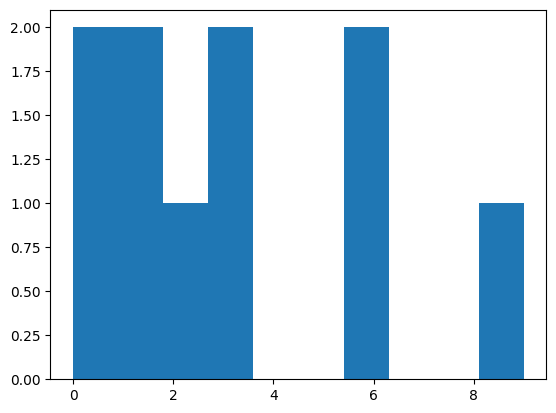

In [27]:
# Plotting the H with matplotlib
import matplotlib.pyplot as plt

plt.hist(A.flat, h[1])

In [28]:
# A.flat? - np.sort()
display(A.flat)
display(np.array(A.flat))
display(np.sort(A, axis=None))

array([1, 0, 0, 3, 1, 3, 6, 6, 2, 9])

array([0, 0, 1, 1, 2, 3, 3, 6, 6, 9])

(array([2., 2., 1., 2., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

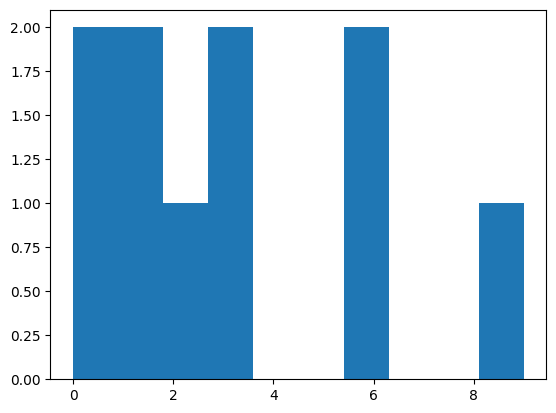

In [29]:
plt.hist(np.sort(A, axis=None), bins=h[1])

(array([5., 2., 2., 1.]),
 array([0.  , 2.25, 4.5 , 6.75, 9.  ]),
 <BarContainer object of 4 artists>)

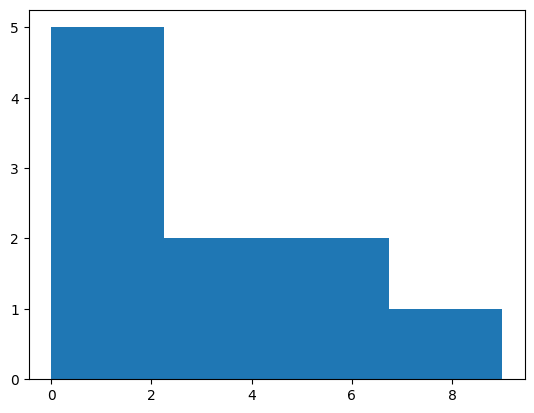

In [30]:
plt.hist(A.flat, bins=h_bin4[1])

<Axes: ylabel='Count'>

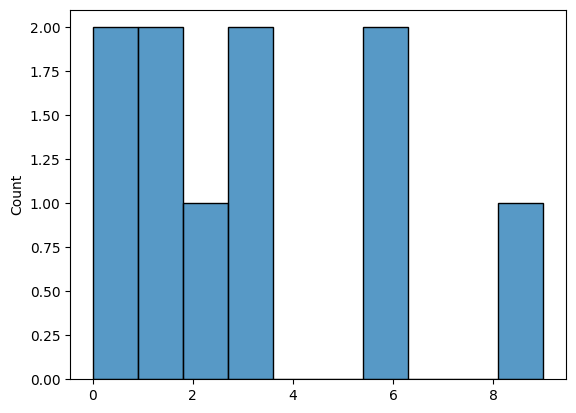

In [31]:
import seaborn as sns

sns.histplot(A.flat, bins=h[1])

<Axes: ylabel='Count'>

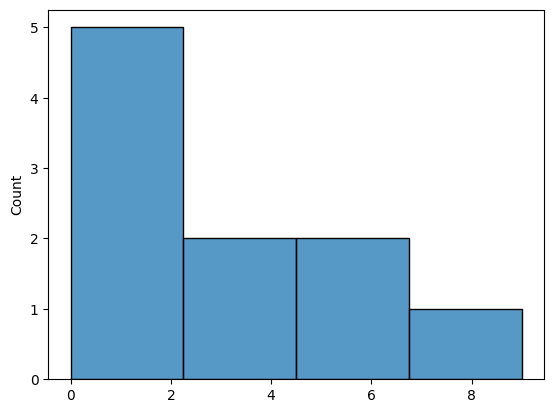

In [32]:
sns.histplot(A.flat, bins=h_bin4[1])

<Axes: ylabel='Count'>

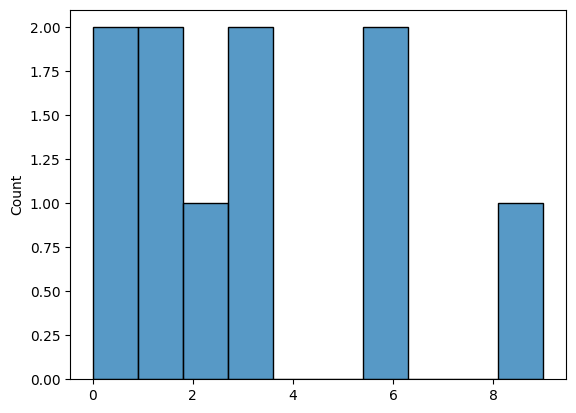

In [33]:
sns.histplot(np.sort(A, axis=None), bins=h[1])

Histograms

histogram(a[, bins, range, density, weights])
Compute the histogram of a dataset.

histogram2d(x, y[, bins, range, density, ...])
Compute the bi-dimensional histogram of two data samples.

histogramdd(sample[, bins, range, density, ...])
Compute the multidimensional histogram of some data.

bincount(x, /[, weights, minlength])
Count number of occurrences of each value in array of non-negative ints.

histogram_bin_edges(a[, bins, range, weights])
Function to calculate only the edges of the bins used by the histogram function.

digitize(x, bins[, right])
Return the indices of the bins to which each value in input array belongs.

In [34]:
# Random and biger matric
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(20, size=(4,7))
B

array([[ 9,  0,  1,  6, 18, 12,  9],
       [13,  4, 17, 19,  0,  6, 15],
       [14,  6,  6, 13,  6, 12,  5],
       [ 4, 10, 14, 13, 11,  2,  0]], dtype=int64)

In [35]:
np.histogram(B)

(array([4, 1, 3, 5, 2, 2, 5, 3, 1, 2], dtype=int64),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]))